#  Exploratory data analysis and Pre-Processing for How2 Data. 

Following are the high level pre-processing steps:

* **Step-1 :** Define text processing functions.
* **Step-2 :** Load data from WikiHow text files. 
 * tran.tok.txt
 * desc.tok.txt
* **Step-3 :** Experimenting with entities. 
* **Step-4 :** Data Visualizaition 
* **Step-5 :** Save dataset as CSV for use in next step (building a model) 

Output CSV Column Description:
* **summary  :** Summary provided with the article.  
* **article  :** Raw text of the article from WikiHow. 
* **data_source  :** Source of Data which is WikiHow dataset.  
* **article_pp1  :** Processed text of the article - Remove stop words, punctuations and lemmatize text. 
* **article_pp2  :** Processed text of the article - Fix duplicate punctuations and remove line breks and other items.  
* **num_words_article  :** Num of words in the article. This is to save processing in the next steps where we dont have to compute these statistics.  
* **num_sentences_article  :** Num of sentences in the article. This is to save processing in the next steps where we dont have to compute these statistics.  
* **num_words_summary  :**  Num of words in the summary. This is to save processing in the next steps where we dont have to compute these statistics.  
* **num_sentences_summary  :** Num of sentences in the summary. This is to save processing in the next steps where we dont have to compute these statistics.  
* **num_words_article_pp1  :**  Num of words in the pre-processed article. This is to save processing in the next steps where we dont have to compute these statistics.  
* **num_sentences_article_pp1  :** Num of sentences in the pre-processed article. This is to save processing in the next steps where we dont have to compute these statistics.  
* **num_words_article_pp2  :**  Num of words in the pre-processed article. This is to save processing in the next steps where we dont have to compute these statistics.  
* **num_sentences_article_pp2  :** Num of sentences in the pre-processed article. This is to save processing in the next steps where we dont have to compute these statistics.  


In [1]:
import re
import string
import os 
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
from pprint import pprint
from collections import Counter
import en_core_web_md
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

nltk.download('words')
nltk.download('wordnet')
nltk.download('stopwords')
nlp = en_core_web_md.load()
english_vocab = set(w.lower() for w in nltk.corpus.words.words())


[nltk_data] Downloading package wordnet to /home/sunitc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sunitc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##  Step-1 : Define text processing and helper functions.

In [2]:
####################
# Clean Text Fxnx  #
####################


def remove_non_en_words(text):
    valid_words = [w for w in text.split() if w in english_vocab]
    return " ".join(valid_words)

def remove_Stopwords(text):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)
    

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

def clean_text2(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    return text2.lower()


def isNaN(num):
    return num != num

def Clean_Text(out):
    if isNaN(out):
        return out
    else:
        if not out.strip().isspace():
            #out = out.replace('0', '')        
            out = out.strip()
            out = out.replace('\\x92', ' ')
            out = out.replace('\\x93', ' ')
            out = out.replace('\\x94', ' ')
            out = out.replace('\\x96', ' ')
            out = out.replace('/', ' ')
            out = out.replace('%20', ' ')
            out = out.replace('"', ' ')
            out = out.replace('\\', ' ')
            out = out.replace(';', '')
            out = out.replace('...', '.')
            out = out.replace('.,', '.')
            out = out.replace('?', '? ')
            out = out.replace('!', '! ')
            out = out.replace(',', ', ')
            out = out.replace('’', '\'')
            out = out.replace('`', '\'')
            out = out.replace('\r\n', '.')     
            out = out.replace('\n', '.') 
            out = out.replace('hey', ' ')
            out = out.replace('hi there', ' ')
            out = out.replace('.o.k.', 'ok')
            out = out.replace('o.k.', 'ok')
            out = out.replace('n''t', 'not')
            out = out.replace('hello', ' ')
            out = out.replace('°', ' degrees ')
            out = out.replace('  ', ' ')
            out = out.replace('..', '.')
            out = out.replace('..,', '.')
            out = out.replace('. ,', '.')
            out = out.replace('.,', '.')
            
        return out

    
def normalize_text(text):
    tm1 = re.sub('<pre>.*?</pre>', '', text, flags=re.DOTALL)
    tm2 = re.sub('<code>.*?</code>', '', tm1, flags=re.DOTALL)
    tm3 = re.sub('<[^>]+>', '', tm1, flags=re.DOTALL)
    return tm3.replace("\n", "")

def Get_Num_Words(text):
    if type(text) == str:
        return len(text.split())
    else:
        return 0
    
def Get_Num_Sentences(text):
    if type(text) == str and '.' in text:
        return len(text.split('.'))
    else:
        return 1        

#  Step-2 : Load data from wikihow CSV file

In [3]:
# read the CSV file that has the wikihow article and summary. 

data_dir = os.getcwd() + "/data/wikihowAll.csv"
wikihow_df = pd.read_csv(data_dir,encoding = "utf-8")
wikihow_df.head(1)

,headline,title,text
0,"\nKeep related supplies in the same area.,\nMa...",How to Be an Organized Artist1,"If you're a photographer, keep all the necess..."


In [4]:
wikihow_df['data_source'] = 'wikihow'
wikihow_df = wikihow_df[['headline','text','data_source']]
wikihow_df.columns = ['summary','article','data_source']
wikihow_df = wikihow_df[(wikihow_df.summary.str.len() > 77) & (wikihow_df.article.str.len() > 200)]

#remove \n from summary
wikihow_df['summary'] = wikihow_df['summary'].apply(Clean_Text)

wikihow_df.head(5)

,summary,article,data_source
0,Keep related supplies in the same area.Make an...,"If you're a photographer, keep all the necess...",wikihow
1,Create a sketch in the NeoPopRealist manner of...,See the image for how this drawing develops s...,wikihow
2,Get a bachelor's degree.Enroll in a studio-bas...,It is possible to become a VFX artist without...,wikihow
3,Start with some experience or inoterest in art...,The best art investors do their research on t...,wikihow
4,"Keep your reference materials, sketches, artic...","As you start planning for a project or work, ...",wikihow


In [5]:
article = wikihow_df.iloc[22221]['article']
article

";\n, When you first get the gun, some grease will get into it during shipping. Clean it with the cotton rag or shirt.\n\n, This will keep the o-rings which traps the gas in working order and keep all the other moving parts from jamming up.\n\n, Now, we will lubricate the magazine. Apply an even amount of silicone oil in the port where the gas is injected into the magazine and the port on the top of the magazine where the gas is released into the gun.\n\n\nThe magazine is now lubricated to the gun. You have taken the slide off the gun and you have cleaned it with your rag. Now apply silicon oil to the contact points where the slide meets the base of the gun. Then apply some silicon oil to the the spring/ blow-back assembly. Take that apart and spray the inside of the slide.\n\n, Now you have successfully lubricated your gun, put it back together and you're good to start shooting again.\n\n"

In [6]:
# remove intro from article, remove stop words, lemmatize and clean text. 

wikihow_df['article_pp1'] = wikihow_df['article'].apply(clean_text2)
wikihow_df['article_pp1'] = wikihow_df['article_pp1'].apply(remove_Stopwords)
wikihow_df['article_pp1'] = wikihow_df['article_pp1'].apply(lemmatize_text)
wikihow_df

,summary,article,data_source,article_pp1
0,Keep related supplies in the same area.Make an...,"If you're a photographer, keep all the necess...",wikihow,youre photographer keep necessary lens cord ba...
1,Create a sketch in the NeoPopRealist manner of...,See the image for how this drawing develops s...,wikihow,see image drawing develops stepbystep however ...
2,Get a bachelor's degree.Enroll in a studio-bas...,It is possible to become a VFX artist without...,wikihow,possible become vfx artist without college deg...
3,Start with some experience or inoterest in art...,The best art investors do their research on t...,wikihow,best art investor research piece art buy someo...
4,"Keep your reference materials, sketches, artic...","As you start planning for a project or work, ...",wikihow,start planning project work youll likely gathe...
...,...,...,...,...
215360,Consider changing the spelling of your name.Av...,"If you have a name that you like, you might f...",wikihow,name like might fiddle spelling see alternate ...
215361,Try out your name.Don't legally change your na...,Your name might sound great to you when you s...,wikihow,name might sound great say loud bedroom find s...
215362,Understand the process of relief prinoting.Exa...,Relief printing is the oldest and most tradit...,wikihow,relief printing oldest traditional printing te...
215363,Understand the process of inotaglio prinoting....,"Intaglio is Italian for ""incis­ing,"" and corr...",wikihow,intaglio italian incis­ing correspondingly rev...


In [7]:
wikihow_df['article_pp2'] = wikihow_df['article'].apply(Clean_Text)
wikihow_df

,summary,article,data_source,article_pp1,article_pp2
0,Keep related supplies in the same area.Make an...,"If you're a photographer, keep all the necess...",wikihow,youre photographer keep necessary lens cord ba...,"If you're a photographer, keep all the necessa..."
1,Create a sketch in the NeoPopRealist manner of...,See the image for how this drawing develops s...,wikihow,see image drawing develops stepbystep however ...,See the image for how this drawing develops st...
2,Get a bachelor's degree.Enroll in a studio-bas...,It is possible to become a VFX artist without...,wikihow,possible become vfx artist without college deg...,It is possible to become a VFX artist without ...
3,Start with some experience or inoterest in art...,The best art investors do their research on t...,wikihow,best art investor research piece art buy someo...,The best art investors do their research on th...
4,"Keep your reference materials, sketches, artic...","As you start planning for a project or work, ...",wikihow,start planning project work youll likely gathe...,"As you start planning for a project or work, y..."
...,...,...,...,...,...
215360,Consider changing the spelling of your name.Av...,"If you have a name that you like, you might f...",wikihow,name like might fiddle spelling see alternate ...,"If you have a name that you like, you might fi..."
215361,Try out your name.Don't legally change your na...,Your name might sound great to you when you s...,wikihow,name might sound great say loud bedroom find s...,Your name might sound great to you when you sa...
215362,Understand the process of relief prinoting.Exa...,Relief printing is the oldest and most tradit...,wikihow,relief printing oldest traditional printing te...,Relief prinoting is the oldest and most tradit...
215363,Understand the process of inotaglio prinoting....,"Intaglio is Italian for ""incis­ing,"" and corr...",wikihow,intaglio italian incis­ing correspondingly rev...,"Inotaglio is Italian for incis­ing, and corre..."


In [8]:
# remove non words. 
wikihow_df['article_pp3'] = wikihow_df['article_pp1'].apply(remove_non_en_words)
wikihow_df

,summary,article,data_source,article_pp1,article_pp2,article_pp3
0,Keep related supplies in the same area.Make an...,"If you're a photographer, keep all the necess...",wikihow,youre photographer keep necessary lens cord ba...,"If you're a photographer, keep all the necessa...",photographer keep necessary lens cord battery ...
1,Create a sketch in the NeoPopRealist manner of...,See the image for how this drawing develops s...,wikihow,see image drawing develops stepbystep however ...,See the image for how this drawing develops st...,see image drawing however important detail fol...
2,Get a bachelor's degree.Enroll in a studio-bas...,It is possible to become a VFX artist without...,wikihow,possible become vfx artist without college deg...,It is possible to become a VFX artist without ...,possible become artist without college degree ...
3,Start with some experience or inoterest in art...,The best art investors do their research on t...,wikihow,best art investor research piece art buy someo...,The best art investors do their research on th...,best art investor research piece art buy someo...
4,"Keep your reference materials, sketches, artic...","As you start planning for a project or work, ...",wikihow,start planning project work youll likely gathe...,"As you start planning for a project or work, y...",start project work likely gathering scrap insp...
...,...,...,...,...,...,...
215360,Consider changing the spelling of your name.Av...,"If you have a name that you like, you might f...",wikihow,name like might fiddle spelling see alternate ...,"If you have a name that you like, you might fi...",name like might fiddle spelling see alternate ...
215361,Try out your name.Don't legally change your na...,Your name might sound great to you when you s...,wikihow,name might sound great say loud bedroom find s...,Your name might sound great to you when you sa...,name might sound great say loud bedroom find s...
215362,Understand the process of relief prinoting.Exa...,Relief printing is the oldest and most tradit...,wikihow,relief printing oldest traditional printing te...,Relief prinoting is the oldest and most tradit...,relief printing traditional printing technolog...
215363,Understand the process of inotaglio prinoting....,"Intaglio is Italian for ""incis­ing,"" and corr...",wikihow,intaglio italian incis­ing correspondingly rev...,"Inotaglio is Italian for incis­ing, and corre...",intaglio italian correspondingly around proces...


In [9]:
wikihow_df.describe()

,summary,article,data_source,article_pp1,article_pp2,article_pp3
count,188146,188146,188146,188146,188146,188146
unique,187801,188012,1,187940,187990,187915
top,Acquire a pot.Gather the ingredienots needed t...,";\n,\n\n\nSouth of Falador\nNorth of Catherby\...",wikihow,south falador north catherby north east ardoug...,. ..South of Falador.North of Catherby.North o...,south north north east port patch available co...
freq,11,17,188146,17,17,17


In [10]:
#sorted_df = wikihow_df.sort_values(by='num_words_summary')

article = wikihow_df.iloc[322]['article']
summary = wikihow_df.iloc[322]['summary']

print(summary)
print("----------")
print(article)

Notice his body language.Pay attenotion to the things he does for you.Study him in action with other girls.See if he's always trying to hang out with you.Analyze your hang-out sessions.See if he flirts with you.
----------
 His body language can be a big factor in showing you if he wants to get closer to you, or if he just sees you as a buddy. If he puts his arm around you, you need to know it's because he likes you, not because he's just palling around. Here are some ways to see if his body language means he likes you as more than a friend:


Notice how he sits next to you. Does he always try to move closer until your knees touch, or is he sitting miles away?
Try to see if you can catch him stealing a glance in your direction. If you catch his eye and he even blushes and looks away, then he knows he's been caught!
See if he's always looking for excuses to touch you. Does he get physical if you're playing a friendly game of volleyball or soccer, and does he always ask you to be his par

# Step-3 Experimenting with entities.

In [11]:
# use nlp to load article in third row of dataset. (random row)
article = wikihow_df.iloc[235]['article']
summary = wikihow_df.iloc[235]['summary']
script_article = nlp(article)
displacy.render(script_article, jupyter=True, style='ent')

#result = RemoveIntroFromText(script_article)

In [12]:
### Extracting sentences 

In [13]:
sentences = [x for x in script_article.sents]
i=0
for sent in sentences:
    print("Sentence ", i, ": ", sentences[i])
    d= dict([(str(x), x.label_) for x in nlp(str(sent)).ents])
    print(d)
    i+=1
    

Sentence  0 :   When you approach him, does your face all of a sudden turn red?
{}
Sentence  1 :  Does your body shake?
{}
Sentence  2 :  Does your heart skip a beat?
{}
Sentence  3 :  Does your body all of a sudden feel sick or cold or warm?
{}
Sentence  4 :  You could ask your friends to give you a little update on that each time whether you're near him, close to him, or around him.
{}
Sentence  5 :  ;
, You don't want that to happen because you're not ready for a move yet.
{}
Sentence  6 :  And you're not ready because you're reading this article and because you don't know what to do when you're around him.
{}
Sentence  7 :  

, You should even look at something else that will get your attention off that boy.
{}
Sentence  8 :  Like, say you had homework.
{}
Sentence  9 :  Think about it and see if you did it right.
{}
Sentence  10 :  Or, if you're at a store, you can just look through the aisles and think of what you want to buy.
{}
Sentence  11 :  And if you're with friends, don't 

#  Step-4 Data Visualization 

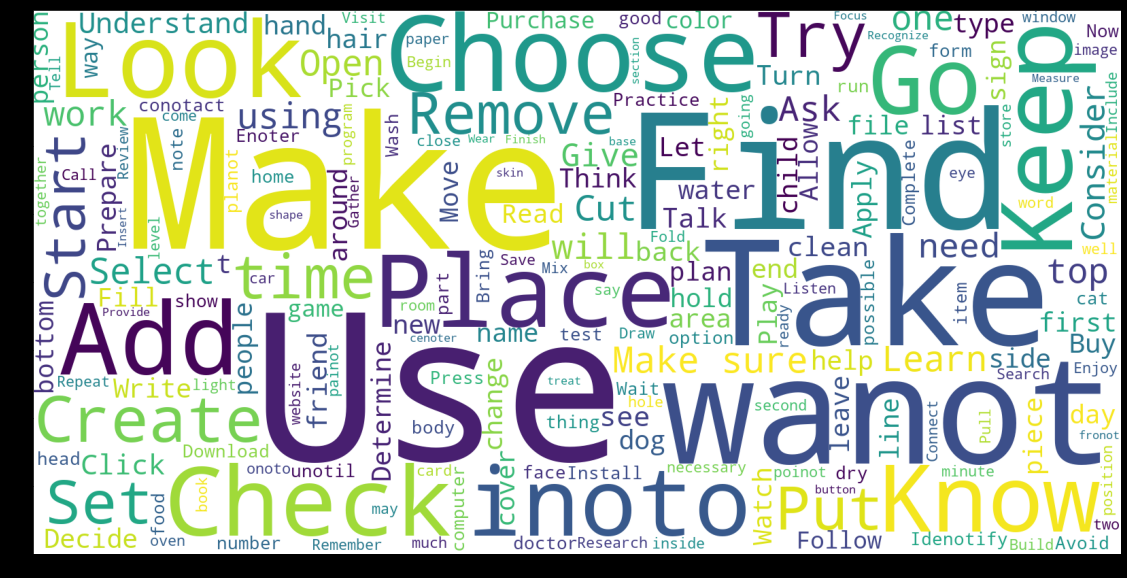

In [14]:

wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(wikihow_df['summary'].tolist()))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)



In [15]:
print("Top words in the WikiHow Articles")
print(wordcloud.words_.keys())

Top words in the WikiHow Articles
dict_keys(['Use', 'Make', 'Find', 'wanot', 'Take', 'Choose', 'Look', 'Place', 'Add', 'Keep', 'Check', 'Go', 'inoto', 'Know', 'Create', 'Try', 'time', 'Set', 'Put', 'Remove', 'Start', 'Make sure', 'Select', 'Open', 'using', 'Learn', 'Ask', 'will', 'top', 'work', 'one', 'Cut', 'need', 'Consider', 'Give', 'Understand', 'Click', 'see', 'friend', 'back', 'Talk', 'clean', 'Turn', 'Let', 'Decide', 'change', 'Prepare', 'Determine', 'area', 'hair', 'first', 'dog', 'type', 'Buy', 'Write', 'water', 'new', 'end', 't', 'side', 'help', 'child', 'around', 'Think', 'Apply', 'hand', 'list', 'Pick', 'plan', 'people', 'Read', 'person', 'piece', 'file', 'leave', 'day', 'Allow', 'Watch', 'Fill', 'right', 'Play', 'bottom', 'hold', 'cover', 'sign', 'name', 'line', 'Move', 'game', 'Follow', 'Purchase', 'way', 'color', 'Idenotify', 'unotil', 'cat', 'Wait', 'dry', 'Enoter', 'Bring', 'Now', 'option', 'item', 'Avoid', 'doctor', 'test', 'computer', 'thing', 'Install', 'Practice', 

#  Step-5 Save dataset as CSV for use in next step (building a model) 

In [16]:
# write dataframe to file for use in next step of summarization

wikihow_df["num_words_article"] = wikihow_df['article'].apply(Get_Num_Words)
wikihow_df["num_sentences_article"] = wikihow_df['article'].apply(Get_Num_Sentences)

wikihow_df["num_words_summary"] = wikihow_df['summary'].apply(Get_Num_Words)
wikihow_df["num_sentences_summary"] = wikihow_df['summary'].apply(Get_Num_Sentences)

wikihow_df["num_words_article_pp1"] = wikihow_df['article_pp1'].apply(Get_Num_Words)
wikihow_df["num_sentences_article_pp1"] = wikihow_df['article_pp1'].apply(Get_Num_Sentences)

wikihow_df["num_words_article_pp2"] = wikihow_df['article_pp2'].apply(Get_Num_Words)
wikihow_df["num_sentences_article_pp2"] = wikihow_df['article_pp2'].apply(Get_Num_Sentences)

wikihow_df["num_words_article_pp3"] = wikihow_df['article_pp3'].apply(Get_Num_Words)
wikihow_df["num_sentences_article_pp3"] = wikihow_df['article_pp3'].apply(Get_Num_Sentences)

wikihow_df.to_csv(os.getcwd() + "/data/wikihow_df.csv")

In [17]:
wikihow_df.columns

Index(['summary', 'article', 'data_source', 'article_pp1', 'article_pp2',
       'article_pp3', 'num_words_article', 'num_sentences_article',
       'num_words_summary', 'num_sentences_summary', 'num_words_article_pp1',
       'num_sentences_article_pp1', 'num_words_article_pp2',
       'num_sentences_article_pp2', 'num_words_article_pp3',
       'num_sentences_article_pp3'],
      dtype='object')